In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data importing & Preprocessing

In [ ]:
import numpy as np
import pandas as pd

- 데이터가 늘어나는 경우 더 임포팅해서 concat 하면 됨

In [ ]:
data_06to10 = pd.read_csv('/content/drive/Shareddrives/22-1 데이터마이닝/TermProject/Data/comtradedata/comtrade_2006_2010_1001.csv')
data_11to15 = pd.read_csv('/content/drive/Shareddrives/22-1 데이터마이닝/TermProject/Data/comtradedata/comtrade_2011_2015_1001.csv')
data_16to20 = pd.read_csv('/content/drive/Shareddrives/22-1 데이터마이닝/TermProject/Data/comtradedata/comtrade_2016_2020_1001.csv')
data_2021     = pd.read_csv('/content/drive/Shareddrives/22-1 데이터마이닝/TermProject/Data/comtradedata/comtrade_2021_1001.csv')

data_06to10.info()
print('')
data_11to15.info()
print('')
data_16to20.info()
print('')
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14667 entries, 0 to 14666
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Classification     14667 non-null  object 
 1   Year               14667 non-null  int64  
 2   Period             14667 non-null  int64  
 3   Period Desc.       14667 non-null  int64  
 4   Aggregate Level    14667 non-null  int64  
 5   Is Leaf Code       14667 non-null  int64  
 6   Trade Flow Code    14667 non-null  int64  
 7   Trade Flow         14667 non-null  object 
 8   Reporter Code      14667 non-null  int64  
 9   Reporter           14667 non-null  object 
 10  Reporter ISO       14609 non-null  object 
 11  Partner Code       14667 non-null  int64  
 12  Partner            14667 non-null  object 
 13  Partner ISO        14475 non-null  object 
 14  Commodity Code     14667 non-null  int64  
 15  Commodity          14667 non-null  object 
 16  Qty Unit Code      146

## Concatenate

In [ ]:
data = pd.concat([data_06to10, data_11to15, data_16to20, data_2021], ignore_index=True)
data['Commodity Code'].value_counts()
data = data[data['Commodity Code'] == 1001]
data.head()


Classification  Year  Period  Period Desc.  Aggregate Level  Is Leaf Code  \
0             H3  2007  2007.0        2007.0                4             0   
1             H3  2007  2007.0        2007.0                4             0   
2             H3  2007  2007.0        2007.0                4             0   
3             H3  2007  2007.0        2007.0                4             0   
4             H3  2007  2007.0        2007.0                4             0   

   Trade Flow Code Trade Flow  Reporter Code Reporter  ...    Partner  \
0                1     Import             12  Algeria  ...  Argentina   
1                1     Import             12  Algeria  ...     Brazil   
2                1     Import             12  Algeria  ...   Bulgaria   
3                1     Import             12  Algeria  ...     Canada   
4                1     Import             12  Algeria  ...      China   

   Partner ISO Commodity Code          Commodity  Qty Unit Code  \
0          ARG           1001  Wheat and meslin.              8   
1          BRA           1001  Wheat and meslin.              8   
2          BGR           1001  Wheat and meslin.              8   
3          CAN           1001  Wheat and meslin.              8   
4          CHN           1001  Wheat and meslin.              8   

              Qty Unit          Qty Netweight (kg)  Trade Value (US$)  Flag  
0  Weight in kilograms  186197155.0    186197155.0           57731310     0  
1  Weight in kilograms   27503070.0     27503070.0            9682621     0  
2  Weight in kilograms    5731443.0      5731443.0            1314270     0  
3  Weight in kilograms  613334275.0    613334275.0          207151582     0  
4  Weight in kilograms    3094019.0      3094019.0             891706     0  

[5 rows x 22 columns]

In [ ]:
data.info()
print(type(data), '\n')
print('Year \t # of data')
data['Year'].value_counts().sort_index()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45410 entries, 0 to 45409
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Classification     45410 non-null  object 
 1   Year               45410 non-null  int64  
 2   Period             26758 non-null  float64
 3   Period Desc.       26758 non-null  float64
 4   Aggregate Level    45410 non-null  int64  
 5   Is Leaf Code       45410 non-null  int64  
 6   Trade Flow Code    45410 non-null  int64  
 7   Trade Flow         45410 non-null  object 
 8   Reporter Code      45410 non-null  int64  
 9   Reporter           45410 non-null  object 
 10  Reporter ISO       45203 non-null  object 
 11  Partner Code       45410 non-null  int64  
 12  Partner            45410 non-null  object 
 13  Partner ISO        44796 non-null  object 
 14  Commodity Code     45410 non-null  int64  
 15  Commodity          45410 non-null  object 
 16  Qty Unit Code      454

2006    2758
2007    2746
2008    3036
2009    2959
2010    3168
2011    2335
2012    2334
2013    2415
2014    2398
2015    2609
2016    3414
2017    3420
2018    3276
2019    3357
2020    3175
2021    2010
Name: Year, dtype: int64

In [ ]:
data['Commodity Code'].value_counts()

1001    45410
Name: Commodity Code, dtype: int64

In [ ]:
data = data[data['Commodity Code'] == 1001]
data

Classification  Year  Period  Period Desc.  Aggregate Level  \
0                 H3  2007  2007.0        2007.0                4   
1                 H3  2007  2007.0        2007.0                4   
2                 H3  2007  2007.0        2007.0                4   
3                 H3  2007  2007.0        2007.0                4   
4                 H3  2007  2007.0        2007.0                4   
...              ...   ...     ...           ...              ...   
45405             H4  2021     NaN           NaN                4   
45406             H4  2021     NaN           NaN                4   
45407             H4  2021     NaN           NaN                4   
45408             H4  2021     NaN           NaN                4   
45409             H4  2021     NaN           NaN                4   

       Is Leaf Code  Trade Flow Code Trade Flow  Reporter Code Reporter  ...  \
0                 0                1     Import             12  Algeria  ...   
1                 0                1     Import             12  Algeria  ...   
2                 0                1     Import             12  Algeria  ...   
3                 0                1     Import             12  Algeria  ...   
4                 0                1     Import             12  Algeria  ...   
...             ...              ...        ...            ...      ...  ...   
45405             0                2     Export            308  Grenada  ...   
45406             0                1     Import            533    Aruba  ...   
45407             0                1     Import            533    Aruba  ...   
45408             0                1     Import            533    Aruba  ...   
45409             0                1     Import            533    Aruba  ...   

           Partner  Partner ISO Commodity Code          Commodity  \
0        Argentina          ARG           1001  Wheat and meslin.   
1           Brazil          BRA           1001  Wheat and meslin.   
2         Bulgaria          BGR           1001  Wheat and meslin.   
3           Canada          CAN           1001  Wheat and meslin.   
4            China          CHN           1001  Wheat and meslin.   
...            ...          ...            ...                ...   
45405   Areas, nes          NaN           1001   Wheat and meslin   
45406     Colombia          COL           1001   Wheat and meslin   
45407  Netherlands          NLD           1001   Wheat and meslin   
45408          USA          USA           1001   Wheat and meslin   
45409   Areas, nes          NaN           1001   Wheat and meslin   

       Qty Unit Code             Qty Unit          Qty Netweight (kg)  \
0                  8  Weight in kilograms  186197155.0    186197155.0   
1                  8  Weight in kilograms   27503070.0     27503070.0   
2                  8  Weight in kilograms    5731443.0      5731443.0   
3                  8  Weight in kilograms  613334275.0    613334275.0   
4                  8  Weight in kilograms    3094019.0      3094019.0   
...              ...                  ...          ...            ...   
45405              8  Weight in kilograms     172368.0       172368.0   
45406              8  Weight in kilograms          1.0            1.0   
45407              8  Weight in kilograms       1857.0         1857.0   
45408              8  Weight in kilograms        562.0          562.0   
45409              8  Weight in kilograms     189826.0       189826.0   

       Trade Value (US$)  Flag  
0               57731310     0  
1                9682621     0  
2                1314270     0  
3              207151582     0  
4                 891706     0  
...                  ...   ...  
45405             101445     0  
45406                  3     0  
45407               1770     0  
45408                820     0  
45409             130299     0  

[45410 rows x 22 columns]

## Linearity of Netweight(kg) & Trade Value (US$)

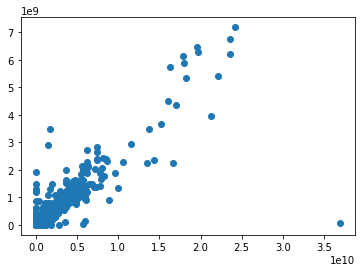

In [ ]:
plt.scatter(data['Netweight (kg)'], data['Trade Value (US$)'])
# plt.xscale('log')
# plt.yscale('log')
plt.show()

Data에서 Netweight와 Trade Value 간의 선형성을 확인할 수 있었다.

In [ ]:
data.loc[data['Trade Flow'] == 'Import', 'From'] = data['Partner']
data.loc[data['Trade Flow'] == 'Import', 'To'] = data['Reporter']

data.loc[data['Trade Flow'] == 'Export', 'From'] = data['Reporter']
data.loc[data['Trade Flow'] == 'Export', 'To'] = data['Partner']

data[['Year', 'Trade Flow', 'Reporter', 'Partner', 'From', 'To']]

Year Trade Flow Reporter      Partner         From          To
0      2007     Import  Algeria    Argentina    Argentina     Algeria
1      2007     Import  Algeria       Brazil       Brazil     Algeria
2      2007     Import  Algeria     Bulgaria     Bulgaria     Algeria
3      2007     Import  Algeria       Canada       Canada     Algeria
4      2007     Import  Algeria        China        China     Algeria
...     ...        ...      ...          ...          ...         ...
45405  2021     Export  Grenada   Areas, nes      Grenada  Areas, nes
45406  2021     Import    Aruba     Colombia     Colombia       Aruba
45407  2021     Import    Aruba  Netherlands  Netherlands       Aruba
45408  2021     Import    Aruba          USA          USA       Aruba
45409  2021     Import    Aruba   Areas, nes   Areas, nes       Aruba

[45410 rows x 6 columns]

In [ ]:
data_FromTo = data[['Year', 'From', 'To', 'Trade Value (US$)']].copy()

data_FromTo

Year         From          To  Trade Value (US$)
0      2007    Argentina     Algeria           57731310
1      2007       Brazil     Algeria            9682621
2      2007     Bulgaria     Algeria            1314270
3      2007       Canada     Algeria          207151582
4      2007        China     Algeria             891706
...     ...          ...         ...                ...
45405  2021      Grenada  Areas, nes             101445
45406  2021     Colombia       Aruba                  3
45407  2021  Netherlands       Aruba               1770
45408  2021          USA       Aruba                820
45409  2021   Areas, nes       Aruba             130299

[45410 rows x 4 columns]

In [ ]:
data_FromTo.loc[data_FromTo['Year'] == 2006] # 2006년 데이터도 잘 있는 것을 확인

Year            From                      To  Trade Value (US$)
341    2006        Bulgaria                 Albania            3178137
342    2006          France                 Albania             485531
343    2006          Greece                 Albania               9443
344    2006           Italy                 Albania             360315
345    2006      Kazakhstan                 Albania            1867187
...     ...             ...                     ...                ...
14404  2006  United Kingdom                   Egypt            2032448
14405  2006             USA                   Egypt          155929145
14406  2006       Australia  Wallis and Futuna Isds                 56
14407  2006            Fiji  Wallis and Futuna Isds               4135
14408  2006   New Caledonia  Wallis and Futuna Isds               2424

[2758 rows x 4 columns]

## Drop 'NaN's (re-import/export)

In [ ]:
print(data_FromTo.isna().sum(), '\n')

data_FT_dn = data_FromTo.dropna()

print(data_FromTo.shape)
print(data_FT_dn.shape)

Year                   0
From                 626
To                   626
Trade Value (US$)      0
dtype: int64 

(45410, 4)
(44784, 4)


보고된 국가를 모르는 경우에는 국가 간 관계를 파악하기 어렵기 때문에 drop에 있어 신중해야 하지만 유추가 불가능한 정보이므로 drop해주었다.

## 'World' value eliminataion


간혹 데이터셋 중 World에서 출발하거나 끝나는 행이 있는데 이는 모든 국가를 합친 값이므로 국가간의 네트워크를 판단하는 데에는 제한이 있다. 따라서 이러한 행도 없애준다.

In [ ]:
for col in ['From', 'To']:
    world_idx = data_FT_dn[data_FT_dn[col] == 'World'].index
    print(world_idx, '\n')
    data_FT_dn.drop(world_idx, inplace=True)

data_FT_dn

Int64Index([14667, 14682, 14702, 14704, 14713, 14729, 14745, 14747, 14757,
            14763,
            ...
            26695, 26715, 26723, 26742, 26744, 26746, 26748, 26750, 26752,
            26755],
           dtype='int64', length=597) 

Int64Index([14714, 14764, 14804, 14838, 14906, 14961, 15019, 15081, 15109,
            15174,
            ...
            26400, 26419, 26461, 26474, 26519, 26533, 26582, 26611, 26645,
            26696],
           dtype='int64', length=381) 



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Year         From          To  Trade Value (US$)
0      2007    Argentina     Algeria           57731310
1      2007       Brazil     Algeria            9682621
2      2007     Bulgaria     Algeria            1314270
3      2007       Canada     Algeria          207151582
4      2007        China     Algeria             891706
...     ...          ...         ...                ...
45405  2021      Grenada  Areas, nes             101445
45406  2021     Colombia       Aruba                  3
45407  2021  Netherlands       Aruba               1770
45408  2021          USA       Aruba                820
45409  2021   Areas, nes       Aruba             130299

[43806 rows x 4 columns]

## Duplicated data checking
- 중복 값을 확인하였다. import와 export를 서로 합치는 과정에서 중복으로 기입될 가능성이 있기 때문에 이를 고려해보았다.

In [ ]:
duplicated_idx = data_FT_dn.duplicated(keep='first') # keep : {'first', 'last', False}

print(duplicated_idx, '\n')
print(duplicated_idx.sum())

data_FT_dn[duplicated_idx].sort_values(by=['Year', 'From', 'To'])

0        False
1        False
2        False
3        False
4        False
         ...  
45405    False
45406    False
45407    False
45408    False
45409    False
Length: 43806, dtype: bool 

265


Year            From         To  Trade Value (US$)
12128  2006          Mexico    Tunisia                  6
14152  2006         Ukraine     Poland              52881
5459   2007           Italy    Estonia                 73
4930   2008      Azerbaijan    Georgia             413614
2882   2008         Belgium    Czechia                 12
...     ...             ...        ...                ...
29495  2020             USA  Sri Lanka           35801224
29493  2020         Ukraine  Sri Lanka           29590189
29494  2020  United Kingdom  Sri Lanka                  5
29508  2020         Uruguay      Chile            5565214
43899  2021         Georgia    Armenia             365465

[265 rows x 4 columns]

In [ ]:
data_FT_dn.drop_duplicates(keep='first', inplace=True)
data_FT_dn

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Year         From          To  Trade Value (US$)
0      2007    Argentina     Algeria           57731310
1      2007       Brazil     Algeria            9682621
2      2007     Bulgaria     Algeria            1314270
3      2007       Canada     Algeria          207151582
4      2007        China     Algeria             891706
...     ...          ...         ...                ...
45405  2021      Grenada  Areas, nes             101445
45406  2021     Colombia       Aruba                  3
45407  2021  Netherlands       Aruba               1770
45408  2021          USA       Aruba                820
45409  2021   Areas, nes       Aruba             130299

[43541 rows x 4 columns]

In [ ]:
print(data_FT_dn.duplicated(keep='first').sum())

0


중복된 값들을 모두 제거하였다.

## Multitime trading summation

In [ ]:
df = data_FT_dn.groupby([data_FT_dn['Year'], data_FT_dn['From'], data_FT_dn['To']], as_index=False).agg({'Trade Value (US$)': np.sum})

df.sort_values(by=['Year', 'From', 'To'])

Year        From                       To  Trade Value (US$)
0      2006     Algeria                    Egypt            5452264
1      2006     Andorra                  Lebanon                  1
2      2006  Areas, nes                    Aruba              14580
3      2006  Areas, nes            Côte d'Ivoire                339
4      2006  Areas, nes                  Ireland            1575677
...     ...         ...                      ...                ...
30921  2021  Uzbekistan               Tajikistan            5794570
30922  2021    Viet Nam              Netherlands                138
30923  2021    Viet Nam              Switzerland               2194
30924  2021      Zambia  United Rep. of Tanzania             188674
30925  2021    Zimbabwe                   Turkey                  4

[30926 rows x 4 columns]

In [ ]:
# Validation

print(data_FT_dn.shape)
print(df.shape, '\n')
print(df['Trade Value (US$)'].sum() - data_FT_dn['Trade Value (US$)'].sum())

(43541, 4)
(30926, 4) 

0


## Zero-trade-value elimination

In [ ]:
zero_idx = df[df['Trade Value (US$)'] == 0].index
print(zero_idx, '\n')

df.drop(zero_idx, inplace=True)
df.loc[df['Trade Value (US$)'] == 0]

Int64Index([ 5263,  8116,  9028, 11127, 11745, 12800, 13100, 18803, 18957,
            20324, 20476, 22475, 23491, 23799, 24019, 24024, 25885, 26261,
            26826, 27406, 27893, 28152, 28262, 28409, 28514, 29552, 30048,
            30123, 30914],
           dtype='int64') 



Empty DataFrame
Columns: [Year, From, To, Trade Value (US$)]
Index: []

## Self-trading node elimination

In [ ]:
df[df['From'] == df['To']]

Year            From              To  Trade Value (US$)
251    2006          Canada          Canada             384152
464    2006         Estonia         Estonia             248239
520    2006          France          France              15067
1369   2006        Slovenia        Slovenia               5913
2108   2007          Canada          Canada             362013
...     ...             ...             ...                ...
26771  2019    South Africa    South Africa             355302
28388  2020      Luxembourg      Luxembourg              91333
29757  2021         Estonia         Estonia             110060
30222  2021      Luxembourg      Luxembourg           36170133
30912  2021  United Kingdom  United Kingdom               9732

[65 rows x 4 columns]

In [ ]:
self_idx = df[df['From'] == df['To']].index

df.drop(self_idx, inplace=True)
df[df['From'] == df['To']]

Empty DataFrame
Columns: [Year, From, To, Trade Value (US$)]
Index: []

## Distribution of 'Trade Value' (hist)

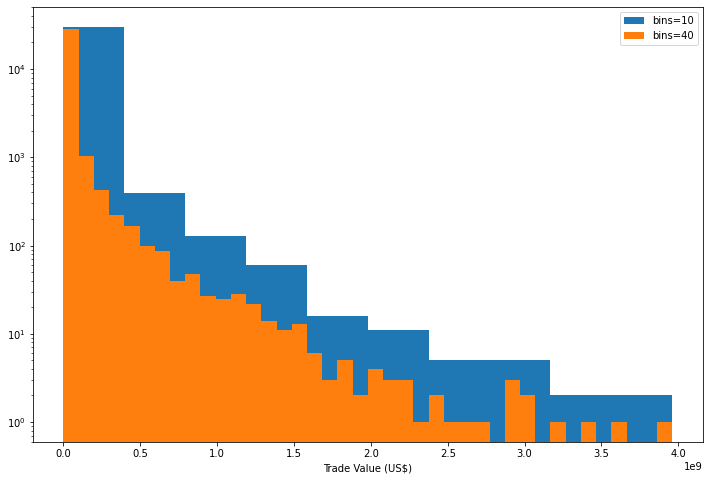

In [ ]:
TV = df['Trade Value (US$)']

plt.figure(figsize=(12, 8))
plt.hist(TV, label='bins=10')
plt.hist(TV, bins=40, label='bins=40')
plt.xlabel('Trade Value (US$)')
plt.yscale('log')
plt.legend()
plt.show()

## Save df to CSV

전처리를 완료한 2006년부터 2021년까지의 데이터를 df_2006_2011_1001.csv 파일로 기존 raw dataset을 불러왔던 comtrade 파일 내에 저장해준다.

In [ ]:
# df.to_csv('/content/drive/Shareddrives/22-1 데이터마이닝/TermProject/Data/comtradedata/df_2006_2021_1001.csv', encoding='utf-8')